In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

In [2]:
data = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.drop(columns={"Unnamed: 2","Unnamed: 3","Unnamed: 4"},inplace=True)

In [5]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.shape

(5572, 2)

In [7]:
data.isna().sum()

v1    0
v2    0
dtype: int64

In [8]:
data["v1"]=data["v1"].replace("spam",1)
data["v1"]= data["v1"].replace("ham",0)
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
X = data["v2"]
Y = data["v1"]

In [10]:
print(X)
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object
0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int64


In [11]:
data["v1"].value_counts()

0    4825
1     747
Name: v1, dtype: int64

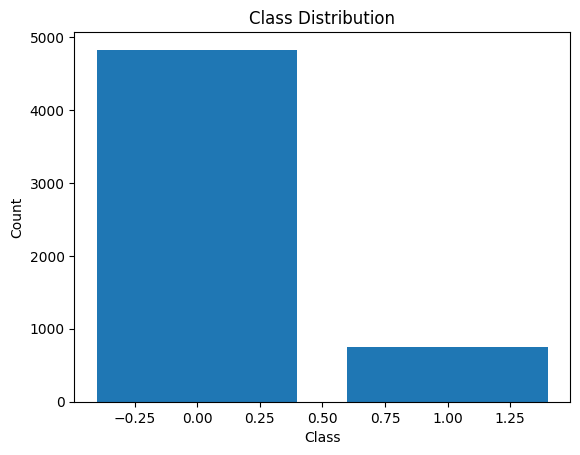

In [12]:
class_counts = data["v1"].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()


In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [14]:
print(X_train.shape)
print(X_test.shape)

(4457,)
(1115,)


In [15]:
vectorizer = TfidfVectorizer(min_df = 1,stop_words = "english",lowercase=True)
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

In [16]:
model = svm.SVC()

In [17]:
model.fit(X_train_features,Y_train)

SVC()

In [18]:
train_data_prediction = model.predict(X_train_features)
print(train_data_prediction)
acc_score1 = accuracy_score(Y_train,train_data_prediction)
print(acc_score1)

[0 0 0 ... 0 0 0]
0.99798070450976


In [19]:
test_data_prediction = model.predict(X_test_features)
print(test_data_prediction)
acc_score2 = accuracy_score(Y_test,test_data_prediction)
print("Accuracy_score :",acc_score2)
prec_score2 = precision_score(Y_test,test_data_prediction)
print("Precision :",prec_score2)
f1_score2 = f1_score(Y_test,test_data_prediction)
print("f1 score :",f1_score2)
recall_score2 = recall_score(Y_test,test_data_prediction)
print("recall score :",recall_score2)

[0 0 0 ... 0 0 0]
Accuracy_score : 0.9901345291479821
Precision : 1.0
f1 score : 0.9588014981273408
recall score : 0.920863309352518


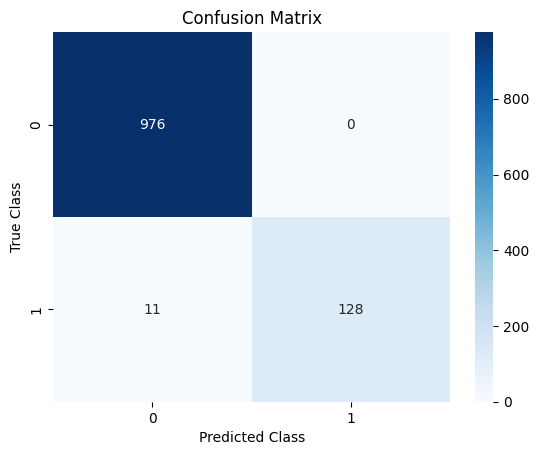

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(Y_test, test_data_prediction)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()


In [21]:
input = ["U don't know how stubborn I am. I didn't even want to go to the hospital. I kept telling Mark I'm not a weak "]
input_features = vectorizer.transform(input)
input_prediction = model.predict(input_features)
if input_prediction[0]==0:
    print('Ham')
else:
    print("Spam")

Ham
